In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [66]:
# iris データ読み込み
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[:100, [2,3]]
y_1 = iris.target[:100]

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

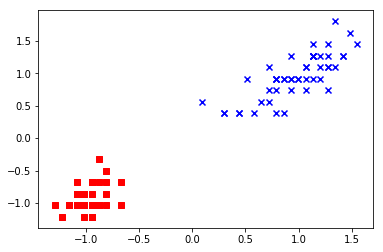

In [68]:
plt.scatter(X_1_std[:50, [0]], X_1_std[:50, [1]], color='red', marker='s')
plt.scatter(X_1_std[50:100, [0]], X_1_std[50:100, [1]], color='blue', marker='x')
plt.show()


In [69]:
from sklearn.model_selection import train_test_split
X_1_train , X_1_test, y_1_train, y_1_test = train_test_split(X_1_std,y_1, test_size= 0.3, random_state=0)

In [70]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear')
svc.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
def plot_decision_regions(X,y,classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ('s','x','o','^','v')
    colors = ('red','blue','linghtgreen','gray''cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max() +1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

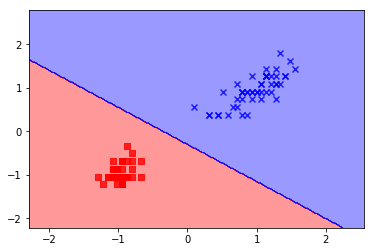

In [72]:
plot_decision_regions(X_1_std, y_1, svc)


In [73]:
from sklearn.datasets import load_iris
iris = load_iris()
X_2 = iris.data[50:150,[2,3]]
y_2 = iris.target[50:150]

In [74]:
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2_std = scaler.transform(X_2)

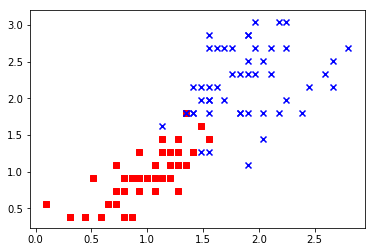

In [75]:
plt.scatter(X_2_std[:50,[0]],X_2_std[:50,[1]],color='red',marker='s')
plt.scatter(X_2_std[50:100,[0]],X_2_std[50:100,[1]],color='blue',marker='x')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
X_2_train , X_2_test, y_2_train, y_2_test =train_test_split(X_2_std,y_2,test_size=0.3,random_state=0)

In [77]:
from sklearn.svm import SVC
svc_slack = SVC(kernel='linear',C=1.0)
svc_slack.fit(X_2_train,y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

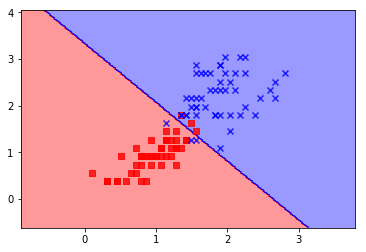

In [78]:
plot_decision_regions(X_2_std, y_2,svc_slack)

In [79]:
svc_slack.score(X_2_test, y_2_test)

0.96666666666666667

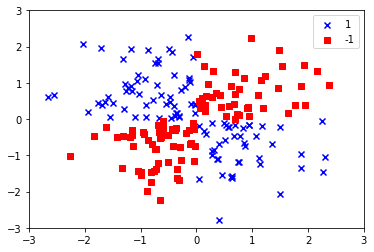

In [80]:
#排他的論理和
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor ,1,-1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [83]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)


linear_svm = SVC(kernel='linear', C=0.1)
linear_svm.fit(X_xor_train, y_xor_train)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

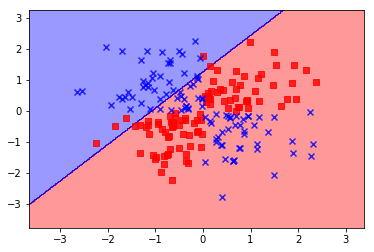

In [84]:
plot_decision_regions(X_xor, y_xor, classifier=linear_svm)


In [86]:
linear_svm.score(X_xor_test, y_xor_test)


0.6166666666666667

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


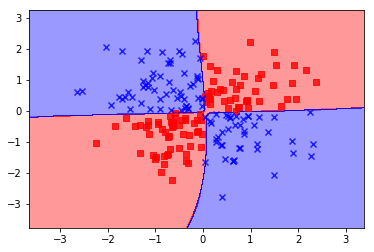

In [100]:
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=100)
rbf_svm.fit(X_xor, y_xor)
print(rbf_svm.fit(X_xor, y_xor))
plot_decision_regions(X_xor, y_xor, classifier=rbf_svm)
